<a href="https://colab.research.google.com/github/njanrepo/MLEProject/blob/main/ML_Proj_stock_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [22]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# New Section

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [24]:
!pip install yfinance scikit-learn statsmodels seaborn

In [25]:
import yfinance as yf

In [26]:
def get_sp500_list():
  payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  first_table = payload[0]
  sp500df = first_table
  sp500_list = sp500df.Symbol.values.tolist()
  return sp500_list

In [27]:
df=yf.download(tickers=get_sp500_list(), period='1d')

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [28]:
symbol='TSLA'
df= yf.download(symbol, period='12mo', )

[*********************100%***********************]  1 of 1 completed


In [29]:
df.shape

(252, 6)

In [30]:
pd.set_option('display.float_format', '{:20,.2f}'.format)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,252.00,729.32,134.13,492.00,646.61,699.99,780.07,"1,234.41"
High,252.00,744.43,138.20,502.50,657.22,712.65,795.83,"1,243.49"
Low,252.00,714.04,131.72,487.57,624.41,681.06,773.46,"1,217.00"
Close,252.00,730.59,135.40,489.61,646.16,698.97,781.37,"1,229.91"
Adj Close,252.00,730.59,135.40,489.61,646.16,698.97,781.37,"1,229.91"
Volume,252.00,"30,813,277.38","18,491,195.77","9,800,600.00","20,059,825.00","26,792,750.00","36,382,175.00","222,126,200.00"


In [31]:
df.nunique()

Open         248
High         251
Low          251
Close        251
Adj Close    251
Volume       252
dtype: int64

In [32]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [34]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [35]:
df.head(10)

,open,high,low,close,adj_close,volume
Date,,,,,,
2020-11-19,492.00,508.61,487.57,499.27,499.27,62475300
2020-11-20,497.99,502.50,489.06,489.61,489.61,32911900
2020-11-23,503.50,526.00,501.79,521.85,521.85,50260300
2020-11-24,540.40,559.99,526.20,555.38,555.38,53648500
2020-11-25,550.06,574.00,545.37,574.00,574.00,48930200
2020-11-27,581.16,598.78,578.45,585.76,585.76,37561100
2020-11-30,602.21,607.80,554.51,567.60,567.60,63003100
2020-12-01,597.59,597.85,572.05,584.76,584.76,40103500
2020-12-02,556.44,571.54,541.21,568.82,568.82,47775700


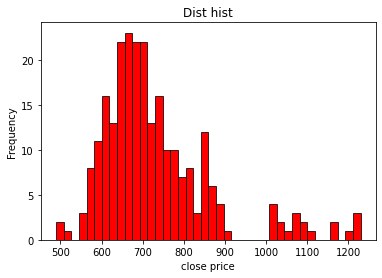

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df.close, bins=40, color='red', alpha=1)
plt.ylabel("Frequency")
plt.xlabel('close price')
plt.title('Dist hist')
plt.show()

In [37]:
def make_X_and_Y(close_prices, period=6):
  X = []
  y = []
  for i in range(len(close_prices)- period):
    X.append(close_prices[i:i+period])
    y.append(close_prices[i+period])
  return X,y

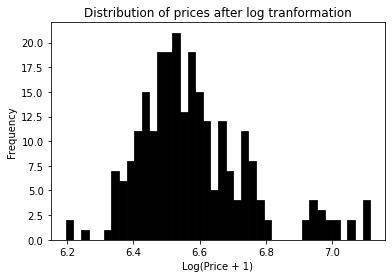

In [38]:
log_price = np.log1p(df.close)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X,y=make_X_and_Y(list(df.close))
dfr = pd.DataFrame({'actual': X, 'predicted': y})

train, test= train_test_split(dfr,test_size=0.15 , shuffle=False,random_state = 0)
train_x = train['actual'].to_list()
train_y = train['predicted'].to_list()
test_x = train['actual'].to_list()
test_y = train['predicted'].to_list()

print(train.shape)
print(test.shape)

(209, 2)
(37, 2)


In [40]:
print((train_x))
print((test_x))
print((train_y))
print((test_y))

[[499.2699890136719, 489.6099853515625, 521.8499755859375, 555.3800048828125, 574.0, 585.760009765625], [489.6099853515625, 521.8499755859375, 555.3800048828125, 574.0, 585.760009765625, 567.5999755859375], [521.8499755859375, 555.3800048828125, 574.0, 585.760009765625, 567.5999755859375, 584.760009765625], [555.3800048828125, 574.0, 585.760009765625, 567.5999755859375, 584.760009765625, 568.8200073242188], [574.0, 585.760009765625, 567.5999755859375, 584.760009765625, 568.8200073242188, 593.3800048828125], [585.760009765625, 567.5999755859375, 584.760009765625, 568.8200073242188, 593.3800048828125, 599.0399780273438], [567.5999755859375, 584.760009765625, 568.8200073242188, 593.3800048828125, 599.0399780273438, 641.760009765625], [584.760009765625, 568.8200073242188, 593.3800048828125, 599.0399780273438, 641.760009765625, 649.8800048828125], [568.8200073242188, 593.3800048828125, 599.0399780273438, 641.760009765625, 649.8800048828125, 604.47998046875], [593.3800048828125, 599.03997802

In [41]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor


In [43]:
from sklearn.tree import DecisionTreeRegressor
def return_model(X, y):
  clf = DecisionTreeRegressor()
  clf.fit(X,y)
  return clf
period = 6
latest_feat = np.array(list(df.close)[-period:]).reshape((1,-1))
classifier = return_model(train_x,train_y)
pred_y = classifier.predict(test_x)
print(classifier.score(test_x, test_y))
dfr = pd.DataFrame({'actual': test_y, 'predicted': pred_y})
dfr

1.0


,actual,predicted
0,567.60,567.60
1,584.76,584.76
2,568.82,568.82
3,593.38,593.38
4,599.04,599.04
...,...,...
204,751.94,751.94
205,753.64,753.64
206,774.39,774.39
207,791.36,791.36


No handles with labels found to put in legend.


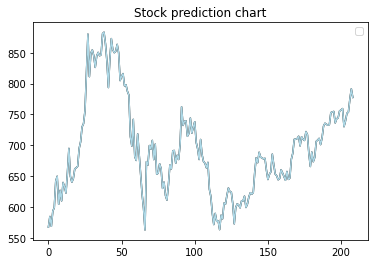

In [44]:
plt.plot(dfr.actual, color='black')
plt.plot(dfr.predicted, color='lightblue')
plt.title("Stock prediction chart")
plt.legend();


In [45]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [46]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [47]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(train_x,train_y)
    train_time = time() - start
    start = time()
    y_pred = model.predict(test_x)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(test_y, y_pred))
    print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
    print("\tR2 score:", r2_score(test_y, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.005s
	Explained variance: 0.9181576263264346
	Mean absolute error: 16.510698090329694
	R2 score: 0.9179184868649788

GradientBoostingRegressor()
	Training time: 0.080s
	Prediction time: 0.001s
	Explained variance: 0.9845572711572325
	Mean absolute error: 7.584573874016508
	R2 score: 0.9845572711572325

ExtraTreesRegressor()
	Training time: 0.159s
	Prediction time: 0.028s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0

RandomForestRegressor()
	Training time: 0.257s
	Prediction time: 0.017s
	Explained variance: 0.984408978438564
	Mean absolute error: 6.892284627668023
	R2 score: 0.9844054380889989

DecisionTreeRegressor()
	Training time: 0.009s
	Prediction time: 0.001s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0

LinearRegression()
	Training time: 0.050s
	Prediction time: 0.001s
	Explained variance: 0.9125268317593853
	Mean absolute error: 16.737230397051146
	R2 score: 0.912526831759

In [51]:
df.close

Date
2020-11-19                 499.27
2020-11-20                 489.61
2020-11-23                 521.85
2020-11-24                 555.38
2020-11-25                 574.00
                     ...         
2021-11-12               1,033.42
2021-11-15               1,013.39
2021-11-16               1,054.73
2021-11-17               1,089.01
2021-11-18               1,096.38
Name: close, Length: 252, dtype: float64

In [60]:
# classifier
from sklearn.ensemble import RandomForestClassifier

def cl_make_X_and_Y(close_prices, period, in_future):
  X = []
  y = []
  for i in range(len(close_prices)- period-in_future):
    X.append(close_prices[i:i+period])
    l = close_prices[i+period:i+period+in_future]
    y.append(calculate_label(l))
  return X,y

def calculate_label(params):
  changes = []
  for j in range(len(params)-1):
    changes.append(params[j+1] - params[j])
  tot = sum(changes)
  if tot > 0:
    return 1;
  elif tot < 0:
     return -1;
  else:
     return 0;

def  return_classification_model(x,y):
    clf = RandomForestRegressor()
    clf.fit(x,y)
    return clf

x, y = cl_make_X_and_Y(df.close, 6, 3)
dfc = pd.DataFrame({'feature': x, 'dependent': y})

train, test= train_test_split(dfc,test_size=0.15 , shuffle=False,random_state = 0)
train_x = train['feature'].to_list()
train_y = train['dependent'].to_list()
test_x = train['feature'].to_list()
test_y = train['dependent'].to_list()
mod = return_classification_model(test_x, train_y)
def clean_data(data):
    return data.dropna(how='all', axis=0)

def predict_price_cls(symbol, period, in_future, data=None):
  print("\rAnalysing :: ", symbol, end="" )
  if(data is None):
    data = yf.download(symbol, period='24mo', progress=False, )
  data = clean_data(data)
  price = data.Close
  features, dep_var = cl_make_X_and_Y(list(price), period, in_future)
  features = np.array(features)
  dep_var = np.array(dep_var)
  # Get Regression model
  clf=return_classification_model(features, dep_var) 
  
  latest_feature = np.array(list(price)[-period:]).reshape((1,-1))
  s_dict = {}
  s_dict['symbol'] = symbol
  s_dict['volatility'] = round(price.std(), 2)
  s_dict['tomorrow'] = round(clf.predict(latest_feature)[0], 2)
  s_dict['today'] = round(price[-1],2)
  return s_dict

predict_price_cls('PYPL', 6, 3)

Analysing ::  PYPL

{'symbol': 'PYPL', 'today': 200.5, 'tomorrow': 0.28, 'volatility': 63.88}